In [2]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv(r"C:\Users\jvish\Downloads\HR_comma_sep.csv")
df = pd.DataFrame(df)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\jvish\\Downloads\\HR_comma_sep.csv'

In [ ]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='age'>

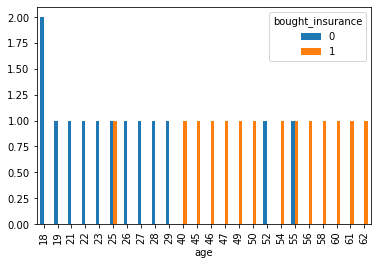

In [23]:
dfs.groupby('bought_insurance').value_counts()
pd.crosstab(dfs.age,dfs.bought_insurance).plot(kind = 'bar')

<AxesSubplot:xlabel='salary'>

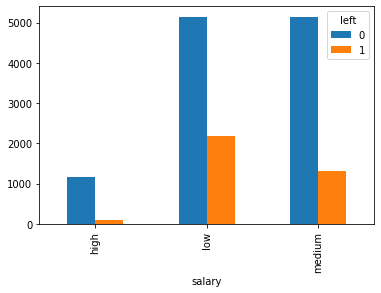

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')

In [ ]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [ ]:
df_with_dummies.head()
df_with_dummies.drop(['salary'], axis=1,inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, random_state=0)
from sklearn.model_selection import train_test_split
x = df_with_dummies
y = df.left
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.3)
model.fit(X_train,y_train)

a = model.predict(X_test)
a

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
pd.Series(a).value_counts()

0    9327
1    1173
dtype: int64

In [ ]:
y_test.value_counts()

0    7995
1    2505
Name: left, dtype: int64

In [ ]:
model.score(X_test,y_test)

0.7838095238095238

In [ ]:
model.intercept_

array([0.09323989])

In [ ]:
model.coef_

array([[-3.64243913e+00,  2.24658314e-03, -8.58985813e-01,
        -1.10201056e+00,  7.49963028e-01,  3.35952077e-01]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y, model.predict(x))
model.predict_proba(X_train)

array([[0.34465989, 0.65534011],
       [0.93055416, 0.06944584],
       [0.60212898, 0.39787102],
       ...,
       [0.80567559, 0.19432441],
       [0.33572993, 0.66427007],
       [0.84121083, 0.15878917]])

## Using a smaller dataset

In [6]:
a = pd.read_csv(r"https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv")

In [7]:
dfs = pd.DataFrame(a)

In [17]:
dfs.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfs[['age']],dfs.bought_insurance,train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_
model.intercept_

array([-4.59444539])

In [ ]:
model.score(X_test,y_test)

1.0

In [ ]:
y_predicted = model.predict(X_test)
model.predict_proba(X_test)

array([[0.89684474, 0.10315526],
       [0.23226788, 0.76773212],
       [0.10698176, 0.89301824],
       [0.14497753, 0.85502247],
       [0.08678413, 0.91321587],
       [0.92484317, 0.07515683]])

In [ ]:
y_predicted

array([0, 1, 1, 1, 1, 0], dtype=int64)

In [ ]:
confusion_matrix(y_test, model.predict(X_test))

array([[2, 0],
       [0, 4]], dtype=int64)